# DISTRIBUCIONES DISCRETAS

## Distribucion de Bernoulli

Variables con ocurrencias binarias

$$ P(X=1) = p \, \, \,$$  (p = 0.5 para el caso de lanzamiento de moneda)

$$ P(X=0) = 1-p $$

## Distribución Binomial

Secuencias repetitivas de varios evento binarios (eventos tipo Bernoulli)

$$ P(k \, \, \text{caras} | n \, \, \text{lanzamientos}) = P(k;n,p) $$

$$ P(k;n,p) = \binom{n}{k} p^k (1-p)^{(n-k)} $$

Ahora, la probabilidad de obtener $k$ o menos éxitos a partir de $n$ intentos está dada por la distribución acumulada: 

$$ 
C(k, n; p) = \sum_{i=0}^k P(i, n;p) = \sum_{i=0}^k {n \choose i} p^i (1-p)^{n-i} 
$$ 

Por convención entendemos que:

$$C(k=3,n=6;p=0.5) = P(k \leq 3, n=6, p=0.5 )$$

## Otras distribuciones discretas

- Multinomial
- Poisson
- Hipergeométrica
- Binomial negativa

In [ ]:
import numpy as np
from numpy.random import binomial
from scipy.stats import binom
from math import factorial
import matplotlib.pyplot as plt

In [ ]:
# definición de la distribución binomial 
def my_binomial(k, n, p):
  return factorial(n)/(factorial(k)*(factorial(n-k)))*pow(p,k)*pow(1-p, n-k)

In [ ]:
# Probabilidad de obtener dos caras en tres lanzamiento de moneda
print('my binomial: {}'.format(my_binomial(2, 3, 0.5)))
dist = binom(3, 0.5)
dist.pmf(2) 
# probability mass function (densidad de probabilidad)

my binomial: 0.375


0.3750000000000001

### Validación del ejercicio hecho a mano

$$
P(k\leq 2, n=3, p=1/2) = \sum_{k=0}^2 \left[ \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k} \right] = \frac{7}{8}
$$

In [ ]:
# Probabilidad acumulada
# Obtener 2 o menos caras
print(7/8.0)
dist.cdf(2)

0.875


0.875

### Simulaciones de secuencias con generadores aleatorios

* Los generadores aleatorios tienen como propósito simular muestras de datos que resultarían de muestreos en la vida real de procesos aleatorios como lanzar una moneda o un dado.

In [ ]:
# simulación con 100 lanzamientos de moneda equilibrada
# (ejecuta esta celda varias veces para observar la variación en los resultados)
p=0.5
n=3
binomial(n, p)

0

In [ ]:
# Vamos a hacer un experimento generando una muestra de conjuntos de 
# lanzamientos de a 3 monedas
arr = []
for _ in range(100):
  arr.append(binomial(n, p))

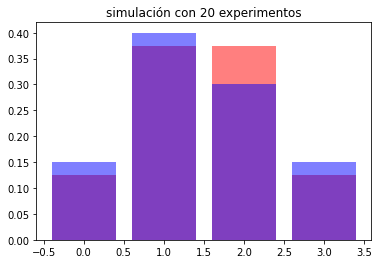

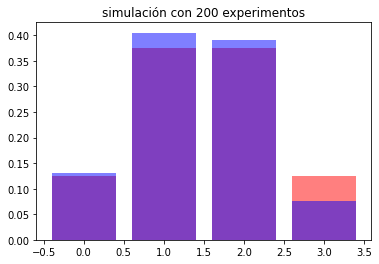

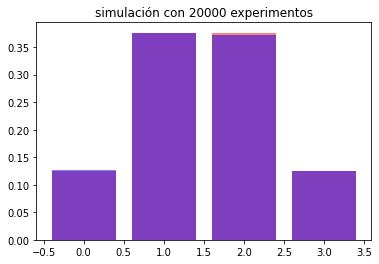

In [ ]:
def plot_hist(num_trials):
  values = [0,1,2,3]
  arr = []
  for _ in range(num_trials):
    arr.append(binomial(3, 0.5))
  distribucion_simulada = np.unique(arr, return_counts=True)[1]/len(arr)
  distribucion_teorica = [binom(3, 0.5).pmf(k) for k in values]
  plt.bar(values, distribucion_teorica, label = 'teoría', alpha = 0.5, color = 'red')
  plt.bar(values, distribucion_simulada, label = 'simulación', alpha = 0.5, color = 'blue')
  plt.title('simulación con {} experimentos'.format(num_trials))
  plt.show()

plot_hist(20)
plot_hist(200)
plot_hist(20000)

## De la binomial a la gaussiana

En la clase 8 vimos como generar secuencias aleatorias de experimentos binomiales ([aquí](https://colab.research.google.com/drive/1MR9VZg19vHyZhvWWuxtNcy_3PZQ7AfwW?usp=sharing)), donde cada experimento era lanzar un cierto número de monedas. 

**¿Qué sucede si el número consecutivo de monedas que lanzamos en cada experimento (trial) es muy largo?**

La función `generate_binomial_trials()` nos muestra lo que sucede si graficamos los resultados de muchos experimentos de lanzar 100 monedas en cada intento, con pyplot: 

<BarContainer object of 43 artists>

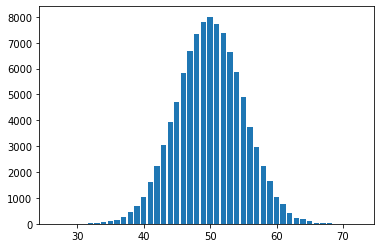

In [ ]:
import numpy as np
from numpy.random import binomial
import matplotlib.pyplot as plt

def generate_binomial_trials(trials=1000, coin_toss=100):
  '''
  el resultado de esta funcion es generar un conjuntos 
  de experimentos binomiales (trials) y de cada uno obtener 
  las cantidades de exitos en cada secuencia (e.j. lanzar monedas).

  * trial: es una secuencia de <coin_toss> lanzamientos de moneda

  * coin_toss: es el numero de monedas lanzadas en cada trial
  '''
  arr = []
  for _ in range(trials):
    arr.append(binomial(coin_toss, 0.5))
  values, dist = np.unique(arr, return_counts=True)

  return values, dist

values, dist = generate_binomial_trials(100000)
plt.bar(values, dist)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b06e2ad7-2e73-4529-91c1-8e44f8b5881a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>